### Домашнє завдання 2

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.decomposition import TruncatedSVD


#### 1. Prepare pictures

Розмір оригінального зображення (shape): (832, 666, 3)


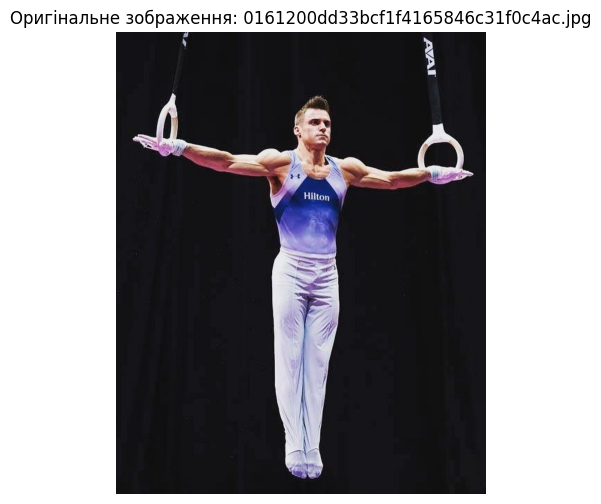


Розмір оригінального зображення (shape): (1500, 1500)


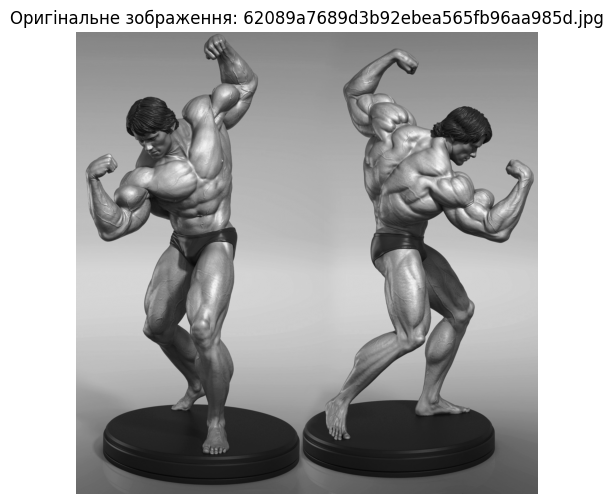


Розмір оригінального зображення (shape): (1200, 675, 3)


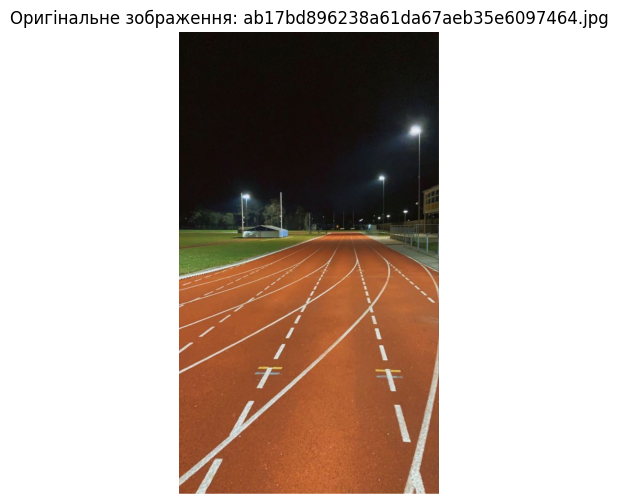

In [34]:
""" Перегляд зобрежень та їх розмірів """
# Список імен файлів зображень
image_files = [
    '0161200dd33bcf1f4165846c31f0c4ac.jpg',
    '62089a7689d3b92ebea565fb96aa985d.jpg',
    'ab17bd896238a61da67aeb35e6097464.jpg'
]

for image_path in image_files:
    try:
        # Виведення зображення
        img = mpimg.imread(image_path)
        # Визначення розміру зображення
        print(f"Розмір оригінального зображення (shape): {img.shape}")

        plt.figure(figsize=(6, 6))
        if img.ndim != 3 or img.shape[2] != 3:
            plt.imshow(img, cmap='gray')
        else:
            plt.imshow(img)
        plt.title(f'Оригінальне зображення: {image_path}')
        plt.axis('off')
        plt.show()

        print("="*60 + "\n")
    except FileNotFoundError:
        print(f"ПОМИЛКА: Файл '{image_path}' не знайдено. Перевірте шлях до файлу.")
    except Exception as e:
        print(f"Сталася невідома помилка при обробці файлу {image_path}: {e}")

Оскільки SVD можна застосувати лише до 2D-даних, визначимо для випадку RGB-зображень: 

- за метод 1 - зміну форми зображення з 3D-матриці на 2D-матрицю, згладивши кожен колірний канал і склавши їх;

- за метод 2 - виконання декомпозиції по окремому каналу;

Для зображення в градаціях сірого одразу застосуємо декомпозицію.

Розлянемо нижче всі три випадки.

#### 2. SVD implementation

##### Picture 1 - зміна форми зображення у 2D-матрицю шляхом укладання каналів горизонтально

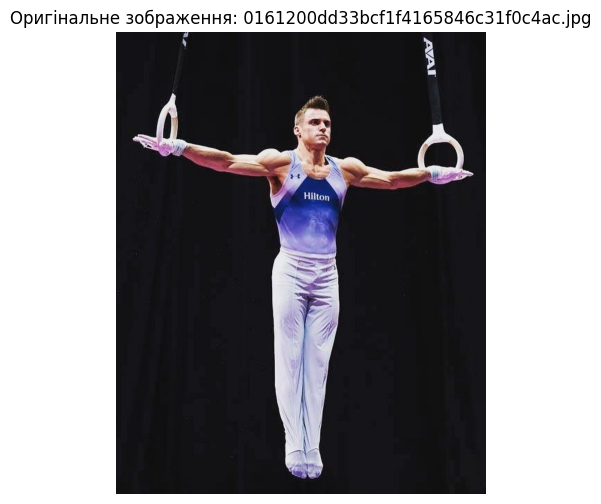

--- Обробка зображення: 0161200dd33bcf1f4165846c31f0c4ac.jpg ---
Розмір оригінального зображення: (832, 666, 3)
Висота: 832, Ширина: 666, Канали: 3


### Метод 1: Зміна форми зображення в 2D-матрицю та SVD ###
Розмір зображення після reshape: (832, 1998)

Результати SVD для 'сплющеного' зображення:
  - Форма матриці U: (832, 832)
  - Кількість сингулярних значень (s): 832
  - Форма матриці Vh: (832, 1998)


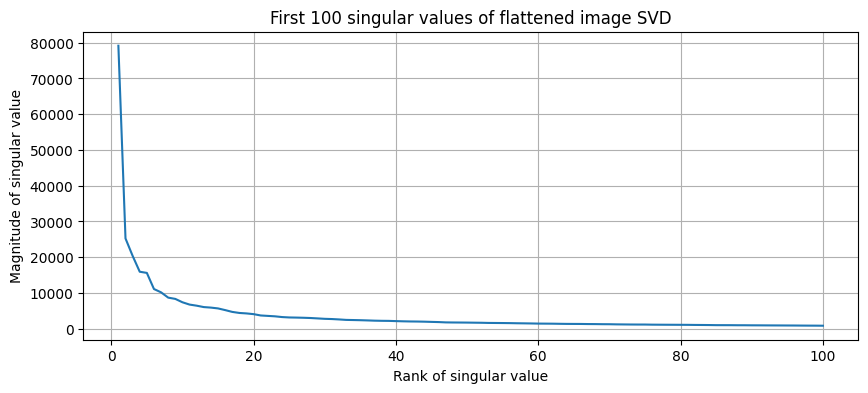

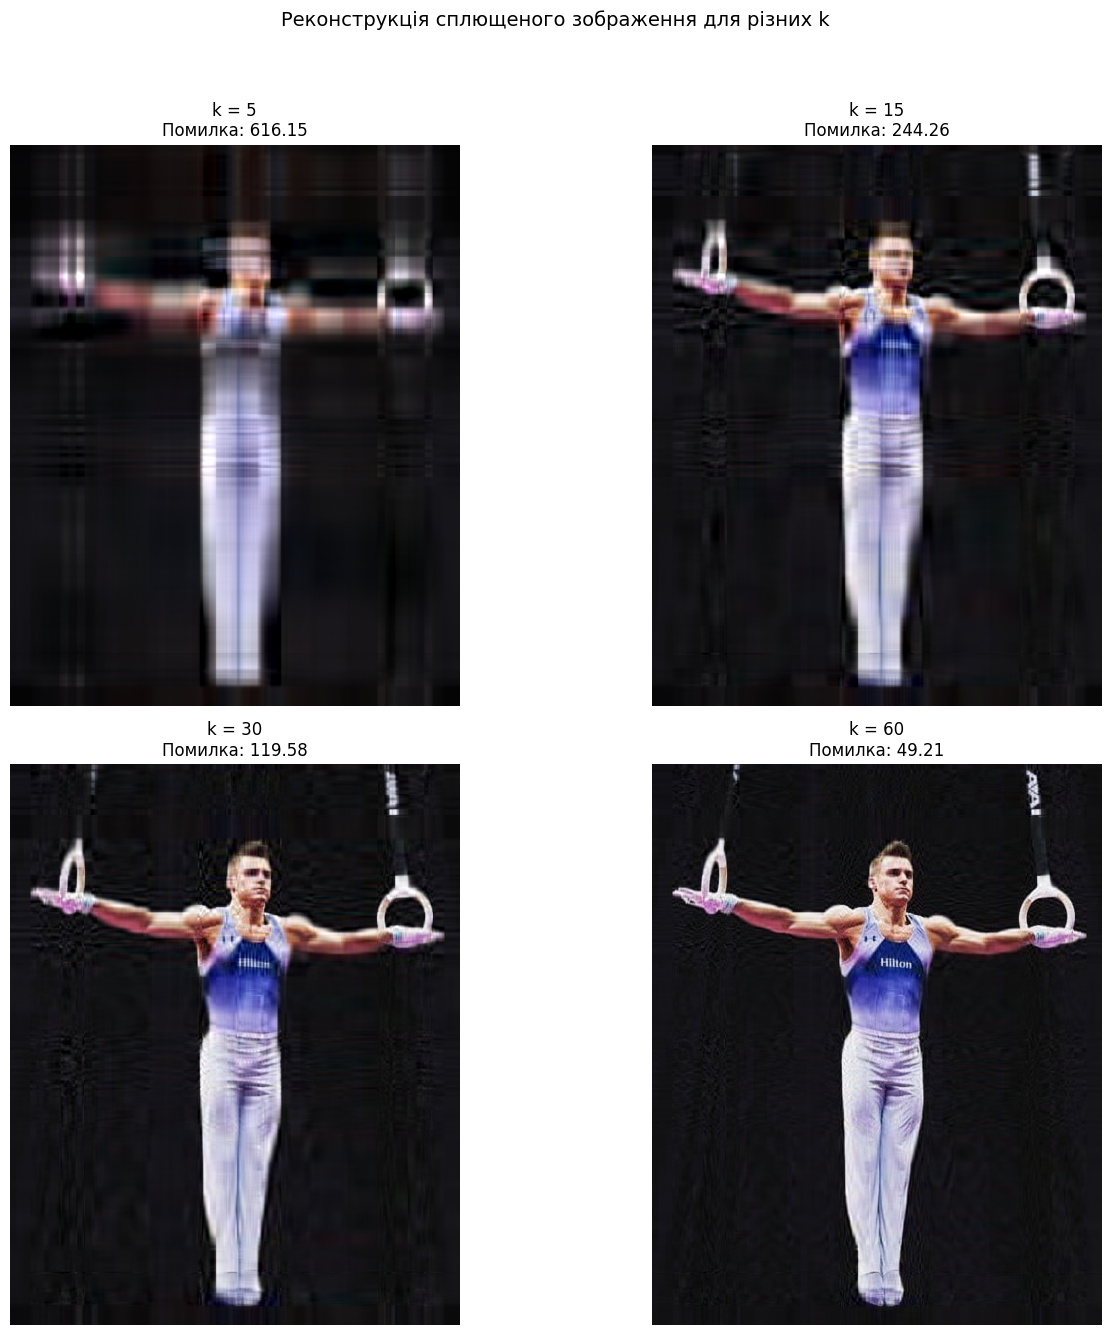

In [35]:
"""
- виведемо перше зображення та його розмір;
- візуалізація сингулярних значень;
- застосування SVD для RGB-зображення за методом 1 (зміна форми в 2D-матрицю);
- реконструкція зображення для різних значень k та оцінка помилки реконструкції.
"""

image_path = '0161200dd33bcf1f4165846c31f0c4ac.jpg'
try:
    # Перше зображення для обробки SVD
    img = mpimg.imread(image_path)

    # Відображення оригінального зображення
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title(f'Оригінальне зображення: {image_path}')
    plt.axis('off')
    plt.show()

    print(f"--- Обробка зображення: {image_path} ---")
    print(f"Розмір оригінального зображення: {img.shape}")

    height, width, channels = img.shape
    print(f"Висота: {height}, Ширина: {width}, Канали: {channels}\n")

    print("\n### Метод 1: Зміна форми зображення в 2D-матрицю та SVD ###")
    flat_image = img.reshape(height, width * channels)
    print(f"Розмір зображення після reshape: {flat_image.shape}")

    # ======================================================================
    # БЛОК 1: Графік сингулярних значень
    # ======================================================================

    # Застосування SVD
    U_flat, s_flat, Vh_flat = np.linalg.svd(flat_image, full_matrices=False)

    print("\nРезультати SVD для 'сплющеного' зображення:")
    print(f"  - Форма матриці U: {U_flat.shape}")
    print(f"  - Кількість сингулярних значень (s): {s_flat.shape[0]}")
    print(f"  - Форма матриці Vh: {Vh_flat.shape}")

    # Візуалізація сингулярних значень для сплющеного зображення
    k = 100
    plt.figure(figsize=(10, 4))
    plt.plot(np.arange(1, k + 1), s_flat[:k])
    plt.title(f'First {k} singular values of flattened image SVD')
    plt.xlabel('Rank of singular value')
    plt.ylabel('Magnitude of singular value')
    plt.grid(True)
    plt.show()

    # ======================================================================
    # БЛОК 2: Стиснення і реконструкція зображення
    # ======================================================================

    # Визначення значень k для реконструкції
    k_values = [5, 15, 30, 60]

    # Реконструкція зображення з різними значеннями k
    fig, axes = plt.subplots(2, 2, figsize=(14, 14))
    fig.suptitle('Реконструкція сплющеного зображення для різних k', fontsize=14)
    axes = axes.flatten()
    for i, k in enumerate(k_values):
        # 1) Отримуємо урізане зображення
        svd = TruncatedSVD(n_components=k)
        truncated_image = svd.fit_transform(flat_image)
        
        # 2) Отримуємо реконструйоване зображення та помилку
        reconstructed_image = svd.inverse_transform(truncated_image)
        reconstruction_error = np.mean(np.square(reconstructed_image - flat_image))
        # 3) Змінюємо форму та обрізаємо значення пікселів
        reconstructed_image_3d = reconstructed_image.reshape(height, width, channels)
        reconstructed_image_clipped = np.clip(reconstructed_image_3d, 0, 255).astype('uint8')
        
        # Відображаємо результат
        axes[i].imshow(reconstructed_image_clipped)
        axes[i].set_title(f'k = {k}\nПомилка: {reconstruction_error:.2f}')
        axes[i].axis('off')
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

except FileNotFoundError:
    print(f"ПОМИЛКА: Файл '{image_path}' не знайдено.")
except Exception as e:
    print(f"Сталася невідома помилка: {e}")

##### Picture 1 - Висновки: 

- при k = 5 та 15 - дуже значна втрата якості (Помилка: 616.15 та 244.26 відповідно). Можна розрізнити лише загальний силует гімнаста та основні кольори, але всі дрібні деталі, як-от риси обличчя, м'язи, логотип "Hilton" на формі, повністю втрачені. Фон не є суцільним чорним, а містить видимі кольорові плями. Це означає, що на цьому рівні до 15 сингулярних значень недостатньо навіть для відтворення базових контурів.

- при k = 30 - помітна втрата якості (Помилка: 119.56). Чітко видно фігуру та проглядається логотип, але все одно зображення нечітке. На цьому етапі зображення вже впізнаване. Тобто навіть риси обличча роблять персону гімнаста, зображеного в повний зріст, впізнаваною.

- при k = 60 - незначна втрата якості (Помилка: 49.21). На перший погляд якість дуже близька до оригіналу. Фон майже ідеально чорний. Щоб помітити різницю, потрібно придивлятися. Для легкого та адекватного сприйняття контенту зображення цього рівня відображеня цілком достатньо.

Тобто помітна втрата якості зображення спостерігається при k до 30. Починаючи з k = 60, якість реконструкції стає настільки високою, що втрати стають несуттєвими для звичайного перегляду.

##### Picture 2 - пряме застосування SVD для зображення у відтінках сірого

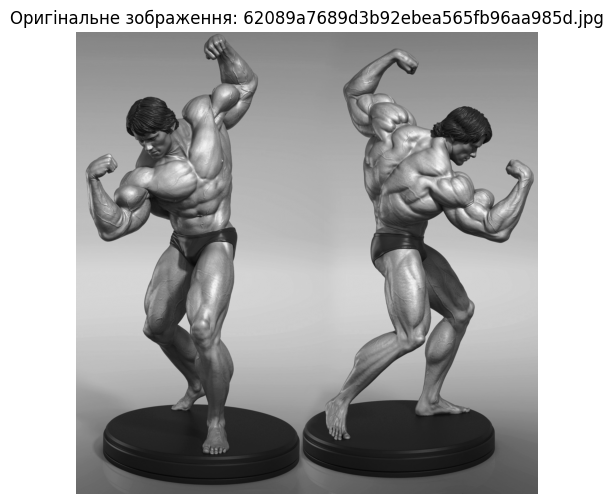

--- Обробка зображення: 62089a7689d3b92ebea565fb96aa985d.jpg ---
Розмір оригінального зображення: (1500, 1500)
Висота: 1500, Ширина: 1500

### Зображення у градаціях сірого (2D), SVD застосовується напряму. ###
Результати SVD для зображення:
  - Форма матриці U: (1500, 1500)
  - Форма вектора s (сингулярні числа): (1500,)
  - Форма матриці Vh: (1500, 1500)


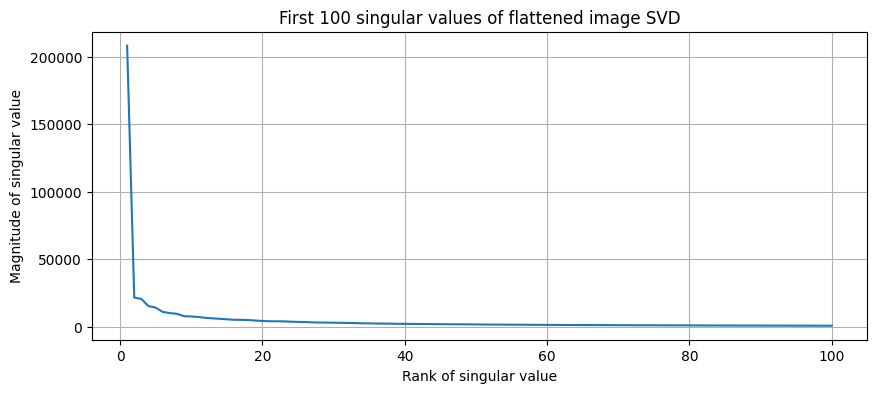

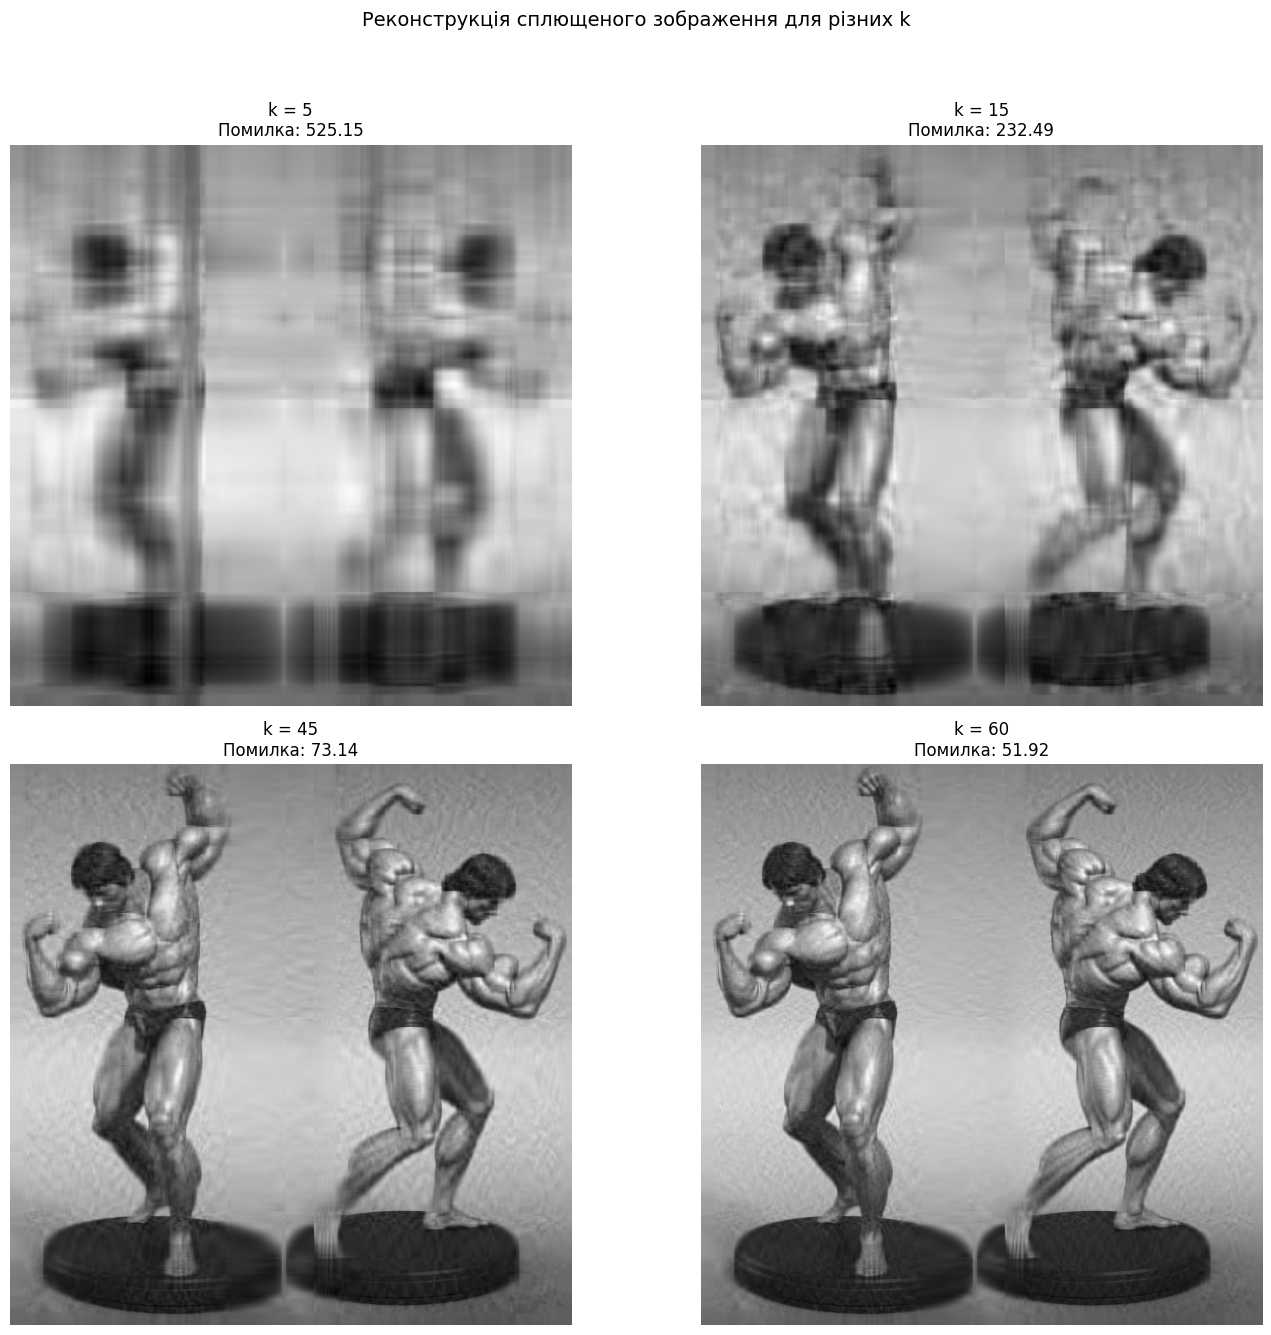

In [36]:
"""
- виведемо друге зображення та його розмір;
- візуалізація сингулярних значень;
- застосування SVD для зображення в градаціях сірого;
- реконструкція зображення для різних значень k та оцінка помилки реконструкції.
"""

image_path = '62089a7689d3b92ebea565fb96aa985d.jpg'
try:
    # Друге зображення для обробки SVD
    img = mpimg.imread(image_path)

    # Відображення оригінального зображення
    plt.figure(figsize=(6, 6))
    plt.imshow(img, cmap='gray' if len(img.shape) == 2 else None)
    plt.title(f'Оригінальне зображення: {image_path}')
    plt.axis('off')
    plt.show()

    print(f"--- Обробка зображення: {image_path} ---")
    print(f"Розмір оригінального зображення: {img.shape}")

    height, width = img.shape
    print(f"Висота: {height}, Ширина: {width}")

    print("\n### Зображення у градаціях сірого (2D), SVD застосовується напряму. ###")

    # ======================================================================
    # БЛОК 1: Графік сингулярних значень
    # ======================================================================
    
    # Застосування SVD декомпозиції
    U, s, Vh = np.linalg.svd(img, full_matrices=False)

    print("Результати SVD для зображення:")
    print(f"  - Форма матриці U: {U.shape}")
    print(f"  - Форма вектора s (сингулярні числа): {s.shape}")
    print(f"  - Форма матриці Vh: {Vh.shape}")

    # Візуалізація сингулярних значень для сплющеного зображення
    k = 100
    plt.figure(figsize=(10, 4))
    plt.plot(np.arange(1, k + 1), s[:k])
    plt.title(f'First {k} singular values of flattened image SVD')
    plt.xlabel('Rank of singular value')
    plt.ylabel('Magnitude of singular value')
    plt.grid(True)
    plt.show()

    # ======================================================================
    # БЛОК 2: Стиснення і реконструкція зображення
    # ======================================================================

    # Визначення значень k для реконструкції
    k_values = [5, 15, 45, 60]

    # Реконструкція зображення з різними значеннями k
    fig, axes = plt.subplots(2, 2, figsize=(14, 14))
    fig.suptitle('Реконструкція сплющеного зображення для різних k', fontsize=14)
    axes = axes.flatten()

    for i, k in enumerate(k_values):
        # 1) Отримуємо урізане зображення
        svd = TruncatedSVD(n_components=k)
        truncated_image = svd.fit_transform(img)

        # 2) Отримуємо реконструйоване зображення та помилку
        reconstructed_image = svd.inverse_transform(truncated_image)
        reconstruction_error = np.mean(np.square(reconstructed_image - img))

        # 3) Обрізаємо значення пікселів
        reconstructed_image_clipped = np.clip(reconstructed_image, 0, 255).astype('uint8')

        # Відображаємо результат
        axes[i].imshow(reconstructed_image_clipped, cmap='gray')
        axes[i].set_title(f'k = {k}\nПомилка: {reconstruction_error:.2f}')
        axes[i].axis('off')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

except FileNotFoundError:
    print(f"ПОМИЛКА: Файл '{image_path}' не знайдено. Будь ласка, завантажте його у Colab.")
except Exception as e:
    print(f"Сталася невідома помилка: {e}")

##### Picture 2 - Висновки: 

- при k = 5 та 15 - дуже значна втрата якості (Помилка: 525.15 та 232.49 відповідно). Навіть для більш інтенсивному рівні 15 - деталізація м'язів відсутня, обличчя нерозбірливі. Градієнт фону виглядає грубим, частина зображення розмите. На цьому етапі втрата якості все ще є критичною.

- при k = 45 - помітна втрата якості (Помилка: 73.13). Вже можна розрізнити основні групи м'язів та повністю сприймаються пози фігур, навіть починає бути впізнаване обличча, що було і на рівнях 30-40. Проте присутня деяка розмитість у зоні ніг, і її не вдалось позбутись.

- при k = 60 - незначна втрата якості (Помилка: 51.93). Якість наблизилася до оригіналу. Рельєф м'язів добре промальований, фігури виглядають об'ємними. Проте навіть тут існує невелика розмитість, та фон все ще не є ідеально плавним градієнтом. 

Трохи помітна втрата якості зберігається навіть k = 60. Гіпотетично цей приклад показав, що для складних зображень з великою кількістю деталей (тут це м'язи або пальці ніг) потрібно більше сингулярних значень (k), щоб досягти хорошої якості реконструкції, порівняно з простішими зображеннями.

##### Picture 3 - робота з окремим кольоровим каналом

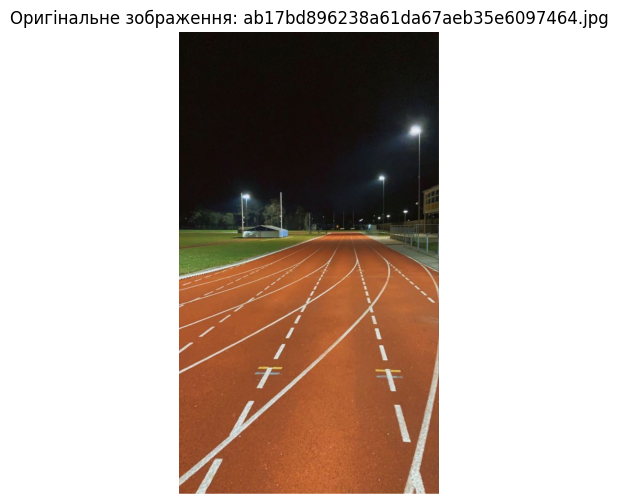

--- Обробка зображення: ab17bd896238a61da67aeb35e6097464.jpg ---
Розмір оригінального зображення: (1200, 675, 3)
Висота: 1200, Ширина: 675, Канали: 3


### Метод 2. Аналіз кожного колірного каналу (R, G, B) ###


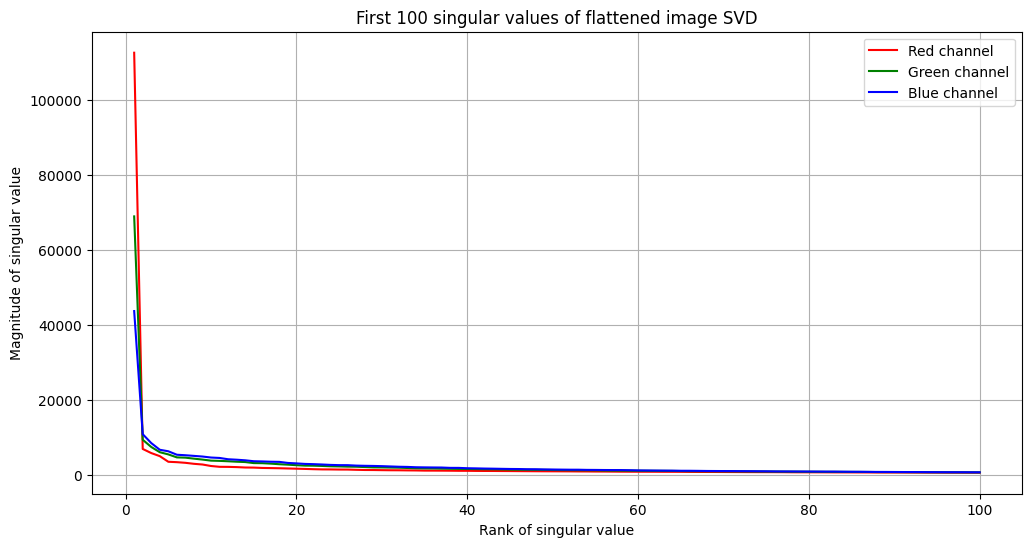

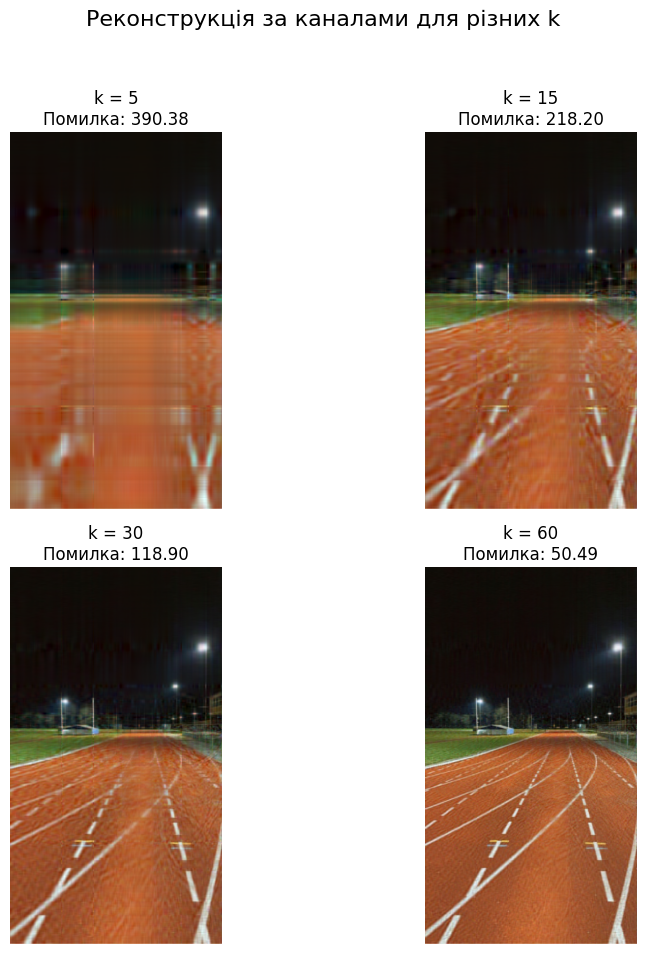

In [38]:
"""
Аналіз зображення за допомогою SVD.
Включає:
1. Аналіз кожного колірного каналу (R, G, B) та графік їх сингулярних значень.
2. Коректне відновлення зображення за всіма каналами та оцінка помилки реконструкції.
"""

image_path = 'ab17bd896238a61da67aeb35e6097464.jpg'

try:
    img = mpimg.imread(image_path)

    # Відображення оригінального зображення
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title(f'Оригінальне зображення: {image_path}')
    plt.axis('off')
    plt.show()

    print(f"--- Обробка зображення: {image_path} ---")
    print(f"Розмір оригінального зображення: {img.shape}")

    height, width, channels = img.shape
    print(f"Висота: {height}, Ширина: {width}, Канали: {channels}\n")

    print("\n### Метод 2. Аналіз кожного колірного каналу (R, G, B) ###")

    # ======================================================================
    # БЛОК 1: Аналіз кожного колірного каналу та графік сингулярних значень
    # ======================================================================

    # Розділяємо на канали R, G, B
    r_channel = img[:, :, 0]
    g_channel = img[:, :, 1]
    b_channel = img[:, :, 2]

    # Застосування SVD до кожного каналу
    _, s_r, _ = np.linalg.svd(r_channel, full_matrices=False)
    _, s_g, _ = np.linalg.svd(g_channel, full_matrices=False)
    _, s_b, _ = np.linalg.svd(b_channel, full_matrices=False)

    # Візуалізація перших 100 сингулярних значень для кожного каналу
    k_plot = 100
    plt.figure(figsize=(12, 6))
    plt.plot(np.arange(1, k_plot + 1), s_r[:k_plot], color='red', label='Red channel')
    plt.plot(np.arange(1, k_plot + 1), s_g[:k_plot], color='green', label='Green channel')
    plt.plot(np.arange(1, k_plot + 1), s_b[:k_plot], color='blue', label='Blue channel')

    plt.title(f'First {k_plot} singular values of flattened image SVD')
    plt.xlabel('Rank of singular value')
    plt.ylabel('Magnitude of singular value')
    plt.legend()
    plt.grid(True)
    plt.show()
    print("\n" + "="*60 + "\n")

    # ======================================================================
    # БЛОК 2: Стиснення і реконструкція зображення
    # ======================================================================

    k_values = [5, 15, 30, 60]

    fig, axes = plt.subplots(2, 2, figsize=(10, 10))
    fig.suptitle('Реконструкція за каналами для різних k', fontsize=16)
    axes = axes.flatten()

    for i, k in enumerate(k_values):
        svd_r = TruncatedSVD(n_components=k)
        svd_g = TruncatedSVD(n_components=k)
        svd_b = TruncatedSVD(n_components=k)

        truncated_r = svd_r.fit_transform(r_channel)
        truncated_g = svd_g.fit_transform(g_channel)
        truncated_b = svd_b.fit_transform(b_channel)

        reconstructed_r = svd_r.inverse_transform(truncated_r)
        reconstructed_g = svd_g.inverse_transform(truncated_g)
        reconstructed_b = svd_b.inverse_transform(truncated_b)

        error_r = np.mean(np.square(reconstructed_r - r_channel))
        error_g = np.mean(np.square(reconstructed_g - g_channel))
        error_b = np.mean(np.square(reconstructed_b - b_channel))
        error = (error_r + error_g + error_b) / 3

        reconstructed_color_img = np.stack([
            np.clip(reconstructed_r, 0, 255),
            np.clip(reconstructed_g, 0, 255),
            np.clip(reconstructed_b, 0, 255)
        ], axis=-1).astype('uint8')

        axes[i].imshow(reconstructed_color_img)
        axes[i].set_title(f'k = {k}\nПомилка: {error:.2f}')
        axes[i].axis('off')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

except FileNotFoundError:
    print(f"ПОМИЛКА: Файл '{image_path}' не знайдено.")
except Exception as e:
    print(f"Сталася невідома помилка: {e}")


##### Picture 3 - Висновки: 

- при k = 5 та 15 - значна втрата якості (Помилка: 390.38 та 218.20 відповідно). При менш інтенсивному відтворенні зображення має лише нариси основних блоків. При 15 пробачається розмітка та контури джерел світла. Якість незадовільнена в обох випадках.

- при k = 30 - помітна втрата якості (Помилка: 118.89). Це перший рівень, де зображення стає чітко впізнаваним. Добре видно лінії перспективи, розмітку, ліхтарі та навіть дерева на задньому плані. Проте, якість все ще низька:

- при k = 60 - хороша якість, незначна втрата якості (Помилка: 50.51). Різницю можна помітити, лише придивляючись до деталей. 

Реконструкція за окремими каналами відбувається коректно, зберігаючи баланс між кольорами.

#### 3. Common conclusions

- У прикладах досліджено стиснення зображень при застосуванні трьох різних наборів умов: зображенння RGB двома різними методами та зображення в градаціях сіроого. Реконструкція відбувається корестно.

- Для зображень всіх розглянутих типів, щоб досягати якості, близької до оригіналу, потрібно не менше 60 компонентів.

- Втрати якості стають значними при k = 30 і нижче.

- Цей експеримент демонструє, що навіть для якісного відновлення не потрібні всі сотні сингулярних значень. Основна візуальна інформація дійсно зосереджена у перших кількох десятках компонентів, що і робить SVD ефективним інструментом для стиснення даних.